In [6]:
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader,Dataset
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import math

print('imported!')
class Net(nn.Module):
    def __init__(self,in_dim,n_hidden_1,n_hidden_2,out_dim):
        super(Net,self).__init__()
        self.layer1=nn.Linear(in_dim,n_hidden_1)
        self.layer2=nn.Linear(n_hidden_1,n_hidden_2)
        self.layer3=nn.Linear(n_hidden_2,out_dim)
        self.relu=nn.ReLU()#ReLU()#Sigmoid()
        self.softmax=nn.Softmax()
        self.dropout=nn.Dropout(0.45)
    def forward(self,x):
        x=self.layer1(x)
        x=self.relu(x)
        x=self.layer2(x)
        x=self.relu(x)
        x=self.layer3(x)
        x=self.relu(x)

        return x
#load data
file_handle=open('train_data.x','rb')
data=pickle.load(file_handle)
file_handle.close()
row_len=len(data)
col_len=len(data[0])
print(row_len,col_len)
s=0
for ii in range(row_len):
    for jj in range(col_len):
        s+=data[ii][jj]
print(s)
#shuffle
np.random.shuffle(data)

imported!
891 8
5296.00685907


train_control:801
survival_rate: 0.0
epoch: 0/2500, Loss: 0.6746279001235962, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 1/2500, Loss: 0.6740854978561401, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 2/2500, Loss: 0.6735503077507019, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 3/2500, Loss: 0.6729946732521057, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 4/2500, Loss: 0.6724636554718018, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 5/2500, Loss: 0.6719697117805481, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 6/2500, Loss: 0.6714871525764465, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 7/2500, Loss: 0.6709977388381958, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 8/2500, Loss: 0.6704921722412109, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 9/2500, Loss: 0.6699626445770264, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 10/2500, Loss: 0

/home/hmx/anaconda3/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


survival_rate: 0.0
epoch: 59/2500, Loss: 0.6292972564697266, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 60/2500, Loss: 0.6280734539031982, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 61/2500, Loss: 0.6267886757850647, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 62/2500, Loss: 0.6254469752311707, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 63/2500, Loss: 0.6240508556365967, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 64/2500, Loss: 0.6226160526275635, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 65/2500, Loss: 0.6211491227149963, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 66/2500, Loss: 0.6198117136955261, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 67/2500, Loss: 0.61845862865448, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 68/2500, Loss: 0.6170612573623657, accuracy_rate: 0.6333333333333333
survival_rate: 0.0
epoch: 69/2500, Loss: 0.615647792

/home/hmx/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


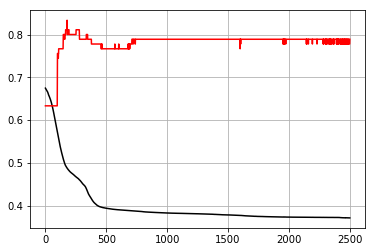

In [7]:
#model
model=Net(7,6,4,2)
LEARNING_RATE=0.003
num_epochs=2500
train_control=int(row_len*0.9)
valid_control=int(row_len*1)
print('train_control:{}'.format(train_control))
#print(data[:train_control,1:col_len])
inputs_tensor=Variable(torch.from_numpy(data[:train_control,1:col_len]),requires_grad=True).float()
target_tensor=Variable(torch.from_numpy(data[:train_control,0])).long()
criterion=nn.CrossEntropyLoss()
#criterion=nn.MSELoss()
optimizer = optim.Adam(filter(lambda p:p.requires_grad,model.parameters()),lr=LEARNING_RATE)

#for plot
all_loss=np.zeros(num_epochs)
all_accuracy_rate=np.zeros(num_epochs)
accuracy_rate=0
valid_inputs=Variable(torch.from_numpy(data[train_control:valid_control,1:col_len]),requires_grad=True).float()
import time
tic=time.time()
for epoch in range(num_epochs):
    running_loss=0
    if 1==1:
        #forward
        out=model(inputs_tensor)#forward
        loss=criterion(out,target_tensor)#get loss
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #get auc data of valid set
        #model.eval()
        
        #restore
        all_loss[epoch]=loss.data[0]
        if 1==1:
            #evaluation
            model.eval()
            valid_target=data[train_control:valid_control,0]
            predict_out=model(valid_inputs)
            #print(predict_out)
            max_value,max_idx=torch.max(predict_out,1)
            #print(max_idx)
            predict=max_idx.data.numpy()
            print('survival_rate: {}'.format(sum(predict)/len(predict)))
            accuracy_rate=1-sum(abs(predict-valid_target))/len(valid_target)
            print('epoch: {}/{}, Loss: {}, accuracy_rate: {}'.format(epoch,num_epochs, loss.data[0], accuracy_rate))
            #accuracy_rate
            all_accuracy_rate[epoch]=accuracy_rate
        #model save
        if epoch%10==0:
            torch.save(model, './models/epoch{}loss{}accuracy_rate{}.pkl'.format(epoch, loss.data[0] ,accuracy_rate))
        
        model.train()
toc=time.time()
print('running time: {}'.format(toc-tic))
#plot
plt.plot(range(num_epochs),all_loss,'k',range(num_epochs),all_accuracy_rate,'r')
plt.grid(True)
plt.show()
#model save
#torch.save(model.state_dict(), 'model.pkl')
torch.save(model, './models/accuracy_rate_in_valid{}.pkl'.format(accuracy_rate))

In [8]:
print('survival_rate: {}'.format(sum(predict)/len(predict)))
print(predict)

survival_rate: 0.35555555555555557
[0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1]
